In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

datos = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.DataFrame(datos)

In [15]:
print("Primeros registros del dataset:")
print(df.head())

Primeros registros del dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Stre

In [16]:
print("Últimos registros del dataset:")
print(df.tail())

Últimos registros del dataset:
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038            

In [17]:
print("Información general del dataset:")
print(df.info())

print("\n\nDescripción estadística del dataset:")
print(df.describe())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperless

**Requisitos:**
Tu tarea es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.

1. **Limpieza de datos con Python:**
* Identificar y solucionar cualquier valor duplicado.

In [18]:
# Identificar y solucionar cualquier valor duplicado.
print("Valores duplicados en el dataset:")
print(df[df.duplicated()])
"""No existen valores duplicados"""

Valores duplicados en el dataset:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


'No existen valores duplicados'

* Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [19]:
print("Tipo de datos de cada columna:")
print(df.dtypes)

Tipo de datos de cada columna:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [20]:
# Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
print("Valores nulos en el dataset:")
print(df.isnull().sum())
"""No existen valores nulos"""

Valores nulos en el dataset:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


'No existen valores nulos'

In [30]:
# 1. Defino los tipos de datos esperados
tipos_datos_esperados = {
    'customerID': 'string',
    'gender': 'category',
    'SeniorCitizen': 'int64',
    'Partner': 'category',
    'Dependents': 'category',
    'tenure': 'int64',
    'PhoneService': 'category',
    'MultipleLines': 'category',
    'InternetService': 'category',
    'OnlineSecurity': 'category',
    'OnlineBackup': 'category',
    'DeviceProtection': 'category',
    'TechSupport': 'category',
    'StreamingTV': 'category',
    'StreamingMovies': 'category',
    'Contract': 'category',
    'PaperlessBilling': 'category',
    'PaymentMethod': 'category',
    'MonthlyCharges': 'float64',
    'TotalCharges': 'float64',
    'Churn': 'category'
}

# 2. Convertimos las columnas que no coinciden
for columna, tipo_dato in tipos_datos_esperados.items():
    if df[columna].dtype != tipo_dato:
        if tipo_dato == 'float64':
            # Convertimos a numérico, manejando errores
            df[columna] = pd.to_numeric(df[columna], errors='coerce')
            print(f"Convirtiendo '{columna}' a {tipo_dato}.")
        elif 'int' in tipo_dato:
            # Convertimos primero a float64 para manejar NaN, luego a entero
            df[columna] = pd.to_numeric(df[columna], errors='coerce').fillna(0).astype(int)
            print(f"Convirtiendo '{columna}' a {tipo_dato}.")
        else:
            # Convertimos al tipo de dato especificado
            df[columna] = df[columna].astype(tipo_dato)
            print(f"Convirtiendo '{columna}' a {tipo_dato}.")

# 3. Verificar los tipos de datos
print("\n\n")
print(df.dtypes)


Convirtiendo 'gender' a category.
Convirtiendo 'Partner' a category.
Convirtiendo 'Dependents' a category.
Convirtiendo 'PhoneService' a category.
Convirtiendo 'MultipleLines' a category.
Convirtiendo 'InternetService' a category.
Convirtiendo 'OnlineSecurity' a category.
Convirtiendo 'OnlineBackup' a category.
Convirtiendo 'DeviceProtection' a category.
Convirtiendo 'TechSupport' a category.
Convirtiendo 'StreamingTV' a category.
Convirtiendo 'StreamingMovies' a category.
Convirtiendo 'Contract' a category.
Convirtiendo 'PaperlessBilling' a category.
Convirtiendo 'PaymentMethod' a category.
Convirtiendo 'Churn' a category.



customerID          string[python]
gender                    category
SeniorCitizen                int64
Partner                   category
Dependents                category
tenure                       int64
PhoneService              category
MultipleLines             category
InternetService           category
OnlineSecurity            category
OnlineBackup   

* Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

In [31]:
# Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).
# Estandarizamos los valores categóricos
for columna in df.columns:
    if df[columna].dtype == 'category':
        df[columna] = df[columna].str.strip().str.lower()
        print(f"\n\nValores únicos en la columna '{columna}':")
        print(df[columna].unique())




Valores únicos en la columna 'gender':
['female' 'male']


Valores únicos en la columna 'Partner':
['yes' 'no']


Valores únicos en la columna 'Dependents':
['no' 'yes']


Valores únicos en la columna 'PhoneService':
['no' 'yes']


Valores únicos en la columna 'MultipleLines':
['no phone service' 'no' 'yes']


Valores únicos en la columna 'InternetService':
['dsl' 'fiber optic' 'no']


Valores únicos en la columna 'OnlineSecurity':
['no' 'yes' 'no internet service']


Valores únicos en la columna 'OnlineBackup':
['yes' 'no' 'no internet service']


Valores únicos en la columna 'DeviceProtection':
['no' 'yes' 'no internet service']


Valores únicos en la columna 'TechSupport':
['no' 'yes' 'no internet service']


Valores únicos en la columna 'StreamingTV':
['no' 'yes' 'no internet service']


Valores únicos en la columna 'StreamingMovies':
['no' 'yes' 'no internet service']


Valores únicos en la columna 'Contract':
['month-to-month' 'one year' 'two year']


Valores únicos en la colum

* Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.

In [33]:
# Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
# Verificar si 'TotalCharges' tiene valores faltantes y rellenar con 0 si 'tenure' es 0
for index, row in df[df['TotalCharges'].isnull()].iterrows():
    if row['tenure'] == 0:
        df.at[index, 'TotalCharges'] = 0

# Mostramos las filas modificadas para confirmar la corrección
print(df[df['TotalCharges'] == 0])

# Contamos cuántas filas fueron corregidas
corregidos = df[df['TotalCharges'] == 0].shape[0]
print(f"\n\nSe corrigieron {corregidos} valores faltantes en 'TotalCharges' con 0.")

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  female              0     yes        yes       0   
753   3115-CZMZD    male              0      no        yes       0   
936   5709-LVOEQ  female              0     yes        yes       0   
1082  4367-NUYAO    male              0     yes        yes       0   
1340  1371-DWPAZ  female              0     yes        yes       0   
3331  7644-OMVMY    male              0     yes        yes       0   
3826  3213-VVOLG    male              0     yes        yes       0   
4380  2520-SGTTA  female              0     yes        yes       0   
5218  2923-ARZLG    male              0     yes        yes       0   
6670  4075-WKNIU  female              0     yes        yes       0   
6754  2775-SEFEE    male              0      no        yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            no  no phone service             dsl                  yes  ... 

In [34]:
print("Valores nulos en el dataset:")
nulos = df.isnull().sum()
print(nulos[nulos > 0])

Valores nulos en el dataset:
Series([], dtype: int64)


* Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

In [67]:
# Identificamos todas las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Detectamos outliers usando IQR para cada columna numérica

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n\nOutliers en '{col}':")
    print(outliers if not outliers.empty else "No se encontraron outliers.")


# El análisis de outliers mediante el rango intercuartílico (IQR) es una técnica estadística estándar utilizada para detectar valores que se encuentran fuera de 1.5 veces el IQR por debajo del primer cuartil (Q1) o por encima del tercer cuartil (Q3).





Outliers en 'SeniorCitizen':
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
20    8779-QRDMV    male              1      no         no       1   
30    3841-NFECX  female              1     yes         no      71   
31    4929-XIHVW    male              1     yes         no       2   
34    3413-BMNZE    male              1      no         no       1   
50    8012-SOUDQ  female              1      no         no      43   
...          ...     ...            ...     ...        ...     ...   
7023  1035-IPQPU  female              1     yes         no      63   
7029  2235-DWLJU  female              1      no         no       6   
7031  3605-JISKB    male              1     yes         no      55   
7032  6894-LFHLY    male              1      no         no       1   
7041  8361-LTMKD    male              1     yes         no       4   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
20             no  no phone service             dsl  

In [44]:
# Convertimos las columnas categóricas al tipo 'category'
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Aplicamos la conversión y reasignar las columnas al DataFrame
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Verificamos la conversión
print(df.dtypes)


customerID          string[python]
gender                    category
SeniorCitizen                int64
Partner                   category
Dependents                category
tenure                       int64
PhoneService              category
MultipleLines             category
InternetService           category
OnlineSecurity            category
OnlineBackup              category
DeviceProtection          category
TechSupport               category
StreamingTV               category
StreamingMovies           category
Contract                  category
PaperlessBilling          category
PaymentMethod             category
MonthlyCharges             float64
TotalCharges               float64
Churn                     category
dtype: object


###2. Exploración de datos con Python:
* Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

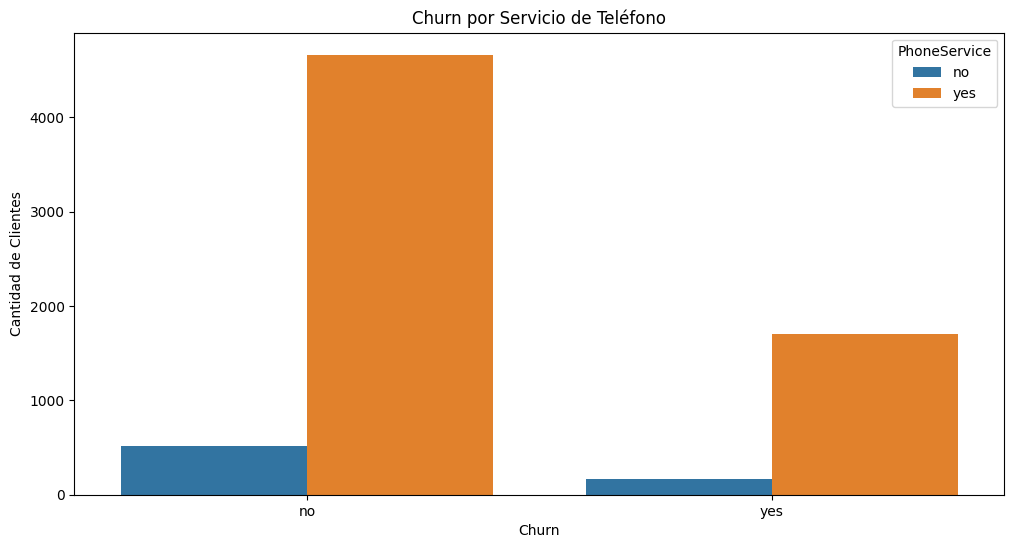

'Breve interpretación:\nEste código genera un gráfico claro y fácil de interpretar sobre la distribución de clientes según Churn, destacando cómo el servicio de teléfono influye en la rotación de los clientes.'

In [68]:
# Visualización univariada 1
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Churn', hue='PhoneService')
plt.title('Churn por Servicio de Teléfono')
plt.xlabel('Churn')
plt.ylabel('Cantidad de Clientes')
plt.show()

"""Breve interpretación:
Este código genera un gráfico claro y fácil de interpretar sobre la distribución de clientes según Churn, destacando cómo el servicio de teléfono influye en la rotación de los clientes."""

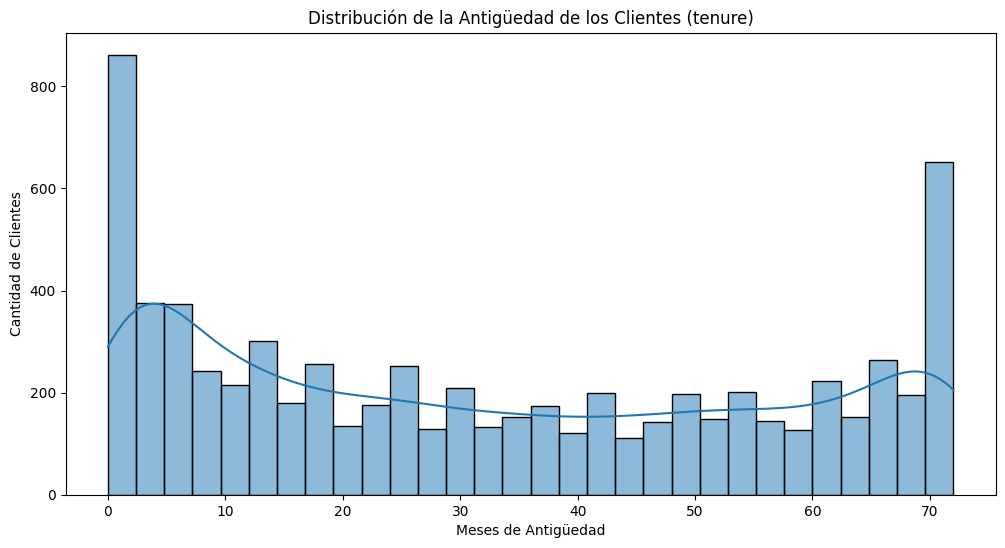

'Breve interpretación:\nEste histograma muestra cómo se distribuyen los clientes según su antigüedad en meses.\nbins=30: Dividimos los datos en 30 intervalos para observar más detalles.\nkde=True: Agregamos una curva de densidad que muestra la tendencia general de la distribución.\nEste gráfico nos permite ver si hay más clientes nuevos (tenure bajo) o antiguos (tenure alto). Si observas picos en el histograma, podría indicar que hay momentos específicos en los que los clientes tienden a cancelar su suscripción.'

In [53]:
# Visualización univariada 2
# Histograma de la antigüedad (tenure)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure', bins=30, kde=True)
plt.title('Distribución de la Antigüedad de los Clientes (tenure)')
plt.xlabel('Meses de Antigüedad')
plt.ylabel('Cantidad de Clientes')
plt.show()
"""Breve interpretación:
Este histograma muestra cómo se distribuyen los clientes según su antigüedad en meses.
bins=30: Dividimos los datos en 30 intervalos para observar más detalles.
kde=True: Agregamos una curva de densidad que muestra la tendencia general de la distribución.
Este gráfico nos permite ver si hay más clientes nuevos (tenure bajo) o antiguos (tenure alto). Se observa picos en el histograma, podría indicar que hay momentos específicos en los que los clientes tienden a cancelar su suscripción."""

* Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

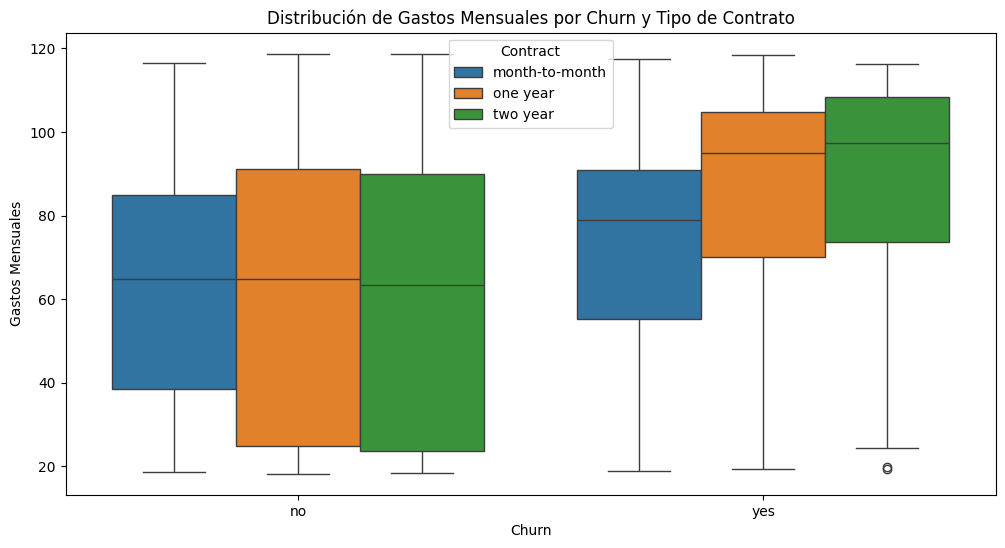

'Breve interpretación:\nmuestra la distribución de los gastos mensuales (MonthlyCharges) entre los clientes que cancelaron el servicio (Churn = Yes) y los que permanecieron (Churn = No), desglosado por el tipo de contrato (Contract).\n'

In [58]:
# Visualización multivariada 1
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='Contract')
plt.title('Distribución de Gastos Mensuales por Churn y Tipo de Contrato')
plt.xlabel('Churn')
plt.ylabel('Gastos Mensuales')
plt.show()

"""Breve interpretación:
muestra la distribución de los gastos mensuales (MonthlyCharges) entre los clientes que cancelaron el servicio (Churn = Yes) y los que permanecieron (Churn = No), desglosado por el tipo de contrato (Contract).
"""

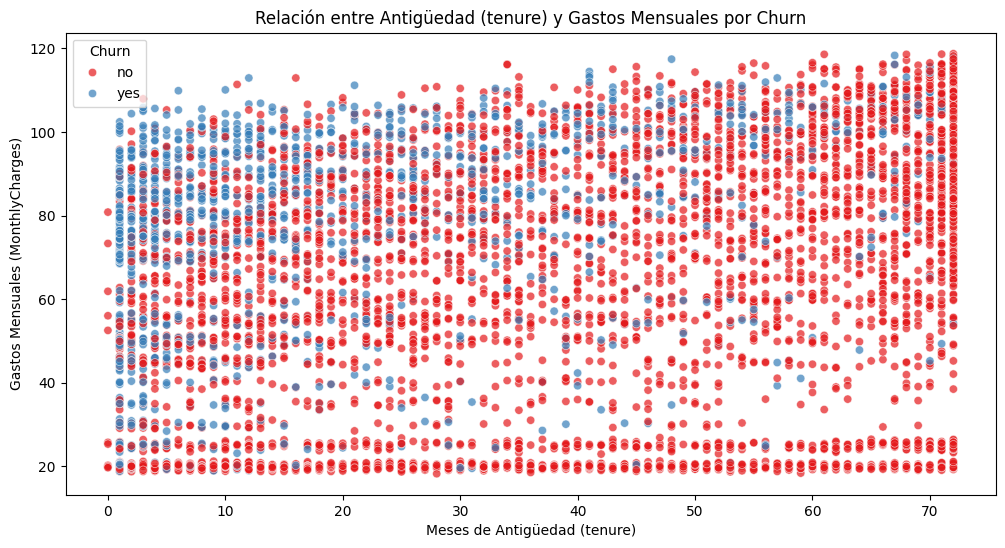

' Breve interpretación:\nEste gráfico es útil para identificar si la antigüedad influye en la cancelación, especialmente entre los clientes con cargos elevados.\nLos clientes con tenure bajo (nuevos) y MonthlyCharges altos que aparecen más en el grupo Churn = Yes, podría indicar que cargos elevados causan cancelaciones tempranas.\nLos clientes leales (con tenure alto) que cancelan, podría ser una señal de problemas en la satisfacción a largo plazo.'

In [65]:
# Visualización multivariada 2
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', palette='Set1', alpha=0.7)
plt.title('Relación entre Antigüedad (tenure) y Gastos Mensuales por Churn')
plt.xlabel('Meses de Antigüedad (tenure)')
plt.ylabel('Gastos Mensuales (MonthlyCharges)')
plt.show()

""" Breve interpretación:
Este gráfico es útil para identificar si la antigüedad influye en la cancelación, especialmente entre los clientes con cargos elevados.
Los clientes con tenure bajo (nuevos) y MonthlyCharges altos que aparecen más en el grupo Churn = Yes, podría indicar que cargos elevados causan cancelaciones tempranas.
Los clientes leales (con tenure alto) que cancelan, podría ser una señal de problemas en la satisfacción a largo plazo."""